## Observations and Insights 

1. The total number of mice involved in this analysis is 248. Data related to Mouse g989 was removed as it was inconsistent.

2. The pie chart hightlights that the distribution of male and female mice is even. As such, we can conclude that gender is being controlled and is not acting as an extraneous variable.

3. From the summary statistics, it can be seen that mice treated with Ramicane had the lowest average tumor volume - closely followed by those on the Capomulin regimen. These regimens also had the largest number of timepoints as shown in the barcharts.

4. The investigation into the relationship between average tumor volume and mouse weight for the Capomulin regimen revealed that there is a strong positive correlation between the two (pearson's r=0.83)

## Dependencies, Read Files and Remove Duplicate Data 

In [61]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
mouse_combined_data = pd.merge(mouse_metadata, study_results, how="outer", on="Mouse ID")

# Display the data table for preview
mouse_combined_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [62]:
# Count the number of unique mice
number_mice = mouse_combined_data["Mouse ID"].nunique()
number_mice

249

In [63]:
# Find if there are any duplicates of the mice data 
duplicate_rows = mouse_combined_data.loc[mouse_combined_data.duplicated(subset=["Mouse ID", "Timepoint"]), "Mouse ID"].unique()
duplicate_rows

array(['g989'], dtype=object)

In [64]:
#Retrieve all the data for the duplicate mouse ID.
duplicate_mouse_info = mouse_combined_data.loc[mouse_combined_data["Mouse ID"]=="g989",:]
duplicate_mouse_info

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [65]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID
clean_mouse_df = mouse_combined_data.loc[mouse_combined_data["Mouse ID"]!="g989",:]

In [66]:
# Check the number of mice in the clean DataFrame to make sure the duplicate has been dropped
clean_mouse_df["Mouse ID"].nunique()

248

## Summary Statistics

In [67]:
# Generate a summary statistics table 

#Calculate the mean for tumor volume for each drug regimen
tumor_volume_mean = clean_mouse_df["Tumor Volume (mm3)"].groupby(clean_mouse_df["Drug Regimen"]).mean()
#print(tumor_volume_mean)


#Calculate the median for tumor volume for each drug regimen
tumor_volume_median = clean_mouse_df["Tumor Volume (mm3)"].groupby(clean_mouse_df["Drug Regimen"]).median()
#print(tumor_volume_median)

#Calculate the variance for tumor volume for each drug regimen
tumor_volume_variance = clean_mouse_df["Tumor Volume (mm3)"].groupby(clean_mouse_df["Drug Regimen"]).var()
#print(tumor_volume_variance)

#Calculate the standard deviation for tumor volume for each drug regimen
tumor_volume_std = clean_mouse_df["Tumor Volume (mm3)"].groupby(clean_mouse_df["Drug Regimen"]).std()
#print(tumor_volume_std)

#Calculate the standard error of the mean (SEM) for tumor volume for each drug regimen
tumor_volume_sem = clean_mouse_df["Tumor Volume (mm3)"].groupby(clean_mouse_df["Drug Regimen"]).sem()

#print(tumor_volume_sem)

# Put the above analyses into a summary dataframe
tumor_volume_summary = pd.DataFrame({"Mean Tumor Volume":tumor_volume_mean, 
                            "Median Tumor Volume":tumor_volume_median, 
                            "Tumor Volume Variance":tumor_volume_variance, 
                            "Tumor Volume Std Deviation":tumor_volume_std, 
                            "Tumor Volume S.E.M.":tumor_volume_sem})

# Display the summary table 
tumor_volume_summary


,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std Deviation,Tumor Volume S.E.M.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [68]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen using the aggregation method, produce the same summary statistics in a single line

clean_mouse_df.groupby(["Drug Regimen"])[["Tumor Volume (mm3)"]].agg(["mean", "median", "var", "std","sem"])

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar Charts

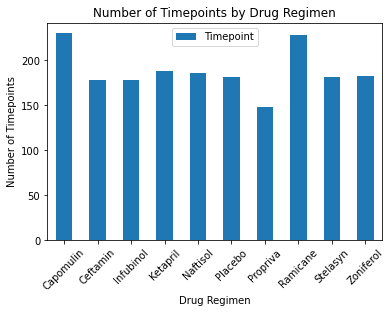

In [69]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.

#Count the number of timepoints for each drug regimen
total_number_timepoints = clean_mouse_df.groupby(["Drug Regimen"])[["Timepoint"]].agg("count")
#total_number_timepoints

#Generate the bar chart
total_number_timepoints_chart = total_number_timepoints.plot(kind="bar", title="Number of Timepoints by Drug Regimen", rot=45)


#Format the bar chart by adding a label to the y-axis
total_number_timepoints_chart.set_ylabel("Number of Timepoints");
#total_number_timepoints_chart.set_xlabel("Drug Regimen")

<function matplotlib.pyplot.bar(x, height, width=0.8, bottom=None, *, align='center', data=None, **kwargs)>

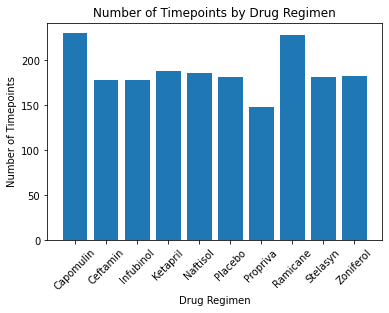

In [70]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pyplot
#Group the data by'Drug Regimen'
drug_regimen_grouped = clean_mouse_df.groupby("Drug Regimen")
#drug_regimen_grouped.head()

#Create a list which holds the names of the drug regimens
drug_list = ["Capomulin", "Ceftamin", "Infubinol", "Ketapril", "Naftisol", "Placebo", 
             "Propriva", "Ramicane", "Stelasyn", "Zoniferol"]
#drug_list

#Count how many timepoints exist for each drug regimen
y_axis = drug_regimen_grouped["Timepoint"].count()
#y_axis

#Find the length of the drug list and this will give the number of ticks which will be present on the x-axis (horizontal axis) 
x_axis = np.arange(len(drug_list))
#x_axis

#Create a list to hold the tick locations
tick_locations = []

#Loop through x_axis to create the ticks for the bar chart's x-axis (horizontal axis)
for x in x_axis:
    tick_locations.append(x)
#tick_locations

#Create the bar chart using matplotlib (note: lists need to be passed through here)
plt.bar(x_axis, y_axis)

#Rename the ticks on the x-axis with the names of the drugs in the drug_list
plt.xticks(tick_locations, drug_list, rotation=45)

# Format bar chart by adding a title and labels and axes
plt.title("Number of Timepoints by Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Timepoints")


#Display the bar chart
plt.bar


## Pie Charts

In [71]:
# Prepare the data to generate a bar plot showing the distribution of female versus male mice using pandas

#Reduce the dataframe and keep the columns related to Mouse ID and Sex
mouse_ID_gender = clean_mouse_df[["Mouse ID","Sex"]]
#mouse_ID_gender.head()

#Remove all the duplicate values so that there is only one row for each Mouse ID
mouse_ID_gender_unique = mouse_ID_gender.drop_duplicates(subset=None, keep='first', inplace=False)

#Make the Mouse ID the index
mouse_ID_gender_unique.set_index("Mouse ID")

#Count how many of each gender there is
gender_counts = mouse_ID_gender_unique["Sex"].value_counts()
gender_counts


Male      125
Female    123
Name: Sex, dtype: int64

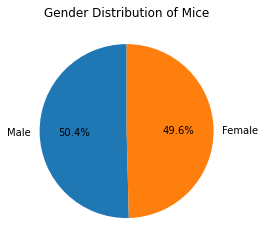

In [72]:
# Generate a pie chart showing the total number of timepoints for all mice tested for each drug regimen using pandas
gender_counts_pie_plot = gender_counts.plot.pie(autopct="%1.1f%%", startangle=90, title="Gender Distribution of Mice")

#Remove the y label
gender_counts_pie_plot.set_ylabel('')

#Display pie plot
gender_counts_pie_plot

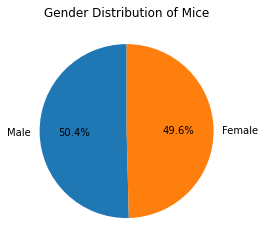

In [73]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.pie(gender_counts, labels=gender_counts.index.values, autopct="%1.1f%%", startangle=90)

#Format pie chart by adding a title
plt.title("Gender Distribution of Mice")

#Show pie chart
plt.show()

## Quartiles, Outliers and Boxplots

In [74]:
# Prepare the data to calculate the final tumor volume of each mouse across four of the treatment regimens: Capomulin, Ramicane, Infubinol, and Ceftamin

#Start by getting the last (greatest timepoint) for each mouse, sort the values from lowest to highest, reset the index and rename the new column
max_timepoint = clean_mouse_df.groupby("Mouse ID")["Timepoint"].max().sort_values().reset_index().rename(columns={"Timepoint": "Max Timepoint"})

#max_timepoint

#Merge max timepoint dataframe with the clean_mouse_df. The Max Timepoint can now be seen at the end of the dataframe
clean_mouse_merged_df = pd.merge(clean_mouse_df, max_timepoint, on="Mouse ID")
clean_mouse_merged_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites,Max Timepoint
0,k403,Ramicane,Male,21,16,0,45.000000,0,45
1,k403,Ramicane,Male,21,16,5,38.825898,0,45
2,k403,Ramicane,Male,21,16,10,35.014271,1,45
3,k403,Ramicane,Male,21,16,15,34.223992,1,45
4,k403,Ramicane,Male,21,16,20,32.997729,1,45


In [75]:
# Put treatments into a list for 'for loop' (and later for plot labels)
treatment_list = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to put the tumor data into
tumor_volume = []

# Create a 'for loop' so that all analysis are performed for each treatment in the treatment list

for treatment in treatment_list:
    
    #Check to see if treatment in the row of the dataframe matches the treatment in the treatment list and set this on its own variable. 
    treatment_match = clean_mouse_merged_df.loc[clean_mouse_merged_df["Drug Regimen"] == treatment]
    
    # When there is a treatment_match (see above), locate matches between Timepoint and Max_Timepoint. When there is a match, it will be set on its own variable.
    timepoint_match = treatment_match.loc[treatment_match["Timepoint"] == treatment_match["Max Timepoint"]]

    #When there is a timepoint_match, this will be used to take the tumor volume value and append it to the tumor volume list
    final_tumor_volume = timepoint_match["Tumor Volume (mm3)"]
    tumor_volume.append(final_tumor_volume)
    
#tumor_volume
    
    #Calculate the IQR for each treatment
    quartiles = final_tumor_volume.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    print(f"IQR for {treatment}: {iqr}")
    
    #Calculate the lower and upper quartiles for each treatment
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    print(f"Lower Bound for {treatment}: {lower_bound}")
    print(f"Upper Bound for {treatment}: {upper_bound}")
    
    #Identify outliers and count them
    outliers_count = (final_tumor_volume.loc[(timepoint_match["Tumor Volume (mm3)"] < lower_bound) | (timepoint_match["Tumor Volume (mm3)"] > upper_bound)]).count()

    print(f"Number of {treatment} outliers: {outliers_count}")
    print(f"------------------------------------------------")   
    

IQR for Capomulin: 7.781863460000004
Lower Bound for Capomulin: 20.70456164999999
Upper Bound for Capomulin: 51.83201549
Number of Capomulin outliers: 0
------------------------------------------------
IQR for Ramicane: 9.098536719999998
Lower Bound for Ramicane: 17.912664470000003
Upper Bound for Ramicane: 54.30681135
Number of Ramicane outliers: 0
------------------------------------------------
IQR for Infubinol: 11.477135160000003
Lower Bound for Infubinol: 36.83290494999999
Upper Bound for Infubinol: 82.74144559000001
Number of Infubinol outliers: 1
------------------------------------------------
IQR for Ceftamin: 15.577752179999997
Lower Bound for Ceftamin: 25.355449580000002
Upper Bound for Ceftamin: 87.66645829999999
Number of Ceftamin outliers: 0
------------------------------------------------


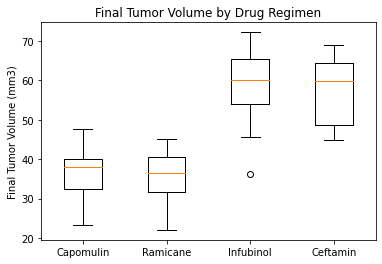

In [76]:
# Generate a box and whisker plot of the final tumor volume of each mouse across four regimens of interest
plt.boxplot(tumor_volume);

# Add a title to the boxplot
plt.title("Final Tumor Volume by Drug Regimen")

# Add a label to the y-axis of the boxplot
plt.ylabel("Final Tumor Volume (mm3)")

#Rename the ticks on the x-axis with the names of the four drugs
plt.xticks([1, 2, 3, 4], ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"])

#Display box and whisker plot
plt.show()


## Line and Scatter Plots

Text(0.5, 1.0, 'Capomulin Treatment of Mouse s185')

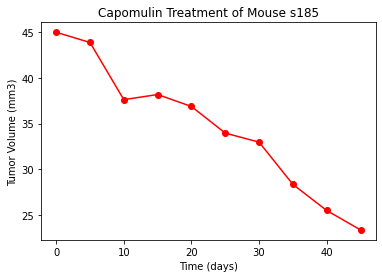

In [77]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin

#Isolate data related to Capomulin
capomulin_data = clean_mouse_merged_df.loc[clean_mouse_merged_df["Drug Regimen"] == "Capomulin"]
#capomulin_data

#Isolate data related to mouse with Mouse ID 's185'
capomulin_data_s185 = capomulin_data.loc[capomulin_data["Mouse ID"]== "s185"] 
capomulin_data_s185

#Generate the line plot
plt.plot(capomulin_data_s185["Timepoint"], capomulin_data_s185["Tumor Volume (mm3)"], marker="o", color = "r")

# Format lineplot by adding labels and a title
plt.xlabel("Time (days)")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Capomulin Treatment of Mouse s185")

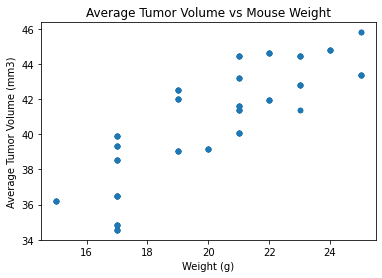

In [78]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen

#Find Average Tumor volume for each mouse
average_tumor_volume = capomulin_data.groupby("Mouse ID")["Tumor Volume (mm3)"].mean().reset_index().rename(columns={"Tumor Volume (mm3)":"Average Tumor Volume (mm3)"})
#average_tumor_volume

#Merge the average tumor volume dataframe with the capomulin dataframe
capomulin_data_merged = pd.merge(capomulin_data, average_tumor_volume, on="Mouse ID")
#capomulin_data_merged

#Isolate data related to mouse weight and average tumor volume
weight_average_tumor_volume = capomulin_data_merged[["Weight (g)", "Average Tumor Volume (mm3)"]]

#Remove duplicates from the data
weight_average_tumor_volume.drop_duplicates()

#Generate the scatter plot with formatting using Pandas
weight_average_tumor_volume.plot(kind="scatter", x="Weight (g)", y="Average Tumor Volume (mm3)", figsize=(6,4),
              title="Average Tumor Volume vs Mouse Weight");


## Correlation and Regression

The correlation between mouse weight and average tumor volume is 0.83
The r-squared is: 0.6962164535925321


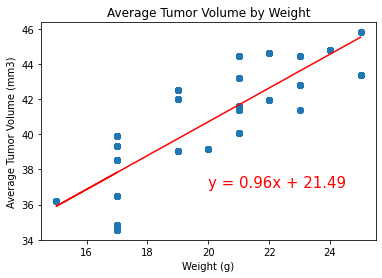

In [79]:
# Calculate the correlation coefficient and linear regression model for mouse weight and average tumor volume for the Capomulin regimen

# Set the x and y values 
x_values = weight_average_tumor_volume["Weight (g)"]
y_values = weight_average_tumor_volume["Average Tumor Volume (mm3)"]

#Calculate Pearson's Correlation Coefficient
correlation = st.pearsonr(x_values,y_values)

#Display the correlation coefficient
print(f"The correlation between mouse weight and average tumor volume is {round(correlation[0],2)}")

# Add the linear regression equation and line to plot
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
#print(slope, intercept, rvalue, pvalue, stderr)

#Calculate the linear regression
regression = x_values * slope + intercept
#regression

#Create the line equation
line = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
#line

#Generate scatterplot using Matplotlib
plt.scatter(x_values,y_values)

#Plot the line
plt.plot(x_values,regression,"r-")
plt.annotate(line,(20,37),fontsize=15,color="red")

#Format scatterplot by adding a title and axes labels
plt.title("Average Tumor Volume by Weight")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")


print(f"The r-squared is: {rvalue**2}")

plt.show()